In [51]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

In [52]:
events_df = pd.read_csv("../Data/interim/events.csv")
people_df = pd.read_csv("../Data/interim/people.csv")

In [3]:
events_df.head()

,Unnamed: 0,Area of Impact,Case Number,Event Number,Standard of Evenidence,Vehicle 1,Vehicle 2
0,0,Non-Collision,60005,1,Rollover/Overturn,1,9999
1,1,Other Objects Set-In-Motion,60005,2,Motor Vehicle In-Transport Strikes or is Struc...,1,2
2,2,Not Reported,60005,3,Motor Vehicle In-Transport,1,2
3,3,Non-Collision,60005,4,Fire/Explosion,1,9999
4,4,Non-Collision,60005,5,Fire/Explosion,2,9999


In [4]:
list(events_df.columns)

['Unnamed: 0',
 'Area of Impact',
 'Case Number',
 'Event Number',
 'Standard of Evenidence',
 'Vehicle 1',
 'Vehicle 2']

In [5]:
people_df.head()

,Unnamed: 0,Age,Age Name,Case Number,County,DOA Name,Day of Week,Death Day of Month,Description of Veh Coll,Drunk Driver,...,Road Type,Sex,Speed Limit Exceeded,Speed limit,Time of Accident,Traveled Speed Veh,Type of Vehicle,Vin Number,Year,ZIP Code
0,0,22,22 Years,60005,SAN DIEGO (73),Died at Scene,Thursday,9,"Motor Vehicle struck by falling cargo,or somet...",0,...,Urban-Principal Arterial-Interstate,Male,"Yes, Exceeded Speed Limit",95,16:10,65,Motorcycle,JS1GN7EA6821,2014,77004
1,1,53,53 Years,60005,SAN DIEGO (73),Not Applicable,Thursday,Not Applicable (Non-Fatal),"Motor Vehicle struck by falling cargo,or somet...",0,...,Urban-Principal Arterial-Interstate,Female,No,45,16:10,65,"4-door sedan, hardtop",KMHWF25S23A7,2014,91911
2,2,67,67 Years,60006,SAN DIEGO (73),Died at Scene,Thursday,3,None,1,...,Rural-Local Road or Street,Male,No,30,18:8,35,Station Wagon (excluding van and truck based),YV1AA885XM18,2013,92028
3,3,30,30 Years,60007,SAN DIEGO (73),Not Applicable,Thursday,Not Applicable (Non-Fatal),None,0,...,NaN,Male,No,75,17:25,65,Station Wagon (excluding van and truck based),2T1KU4EE9BC6,2018,92173
4,4,30,30 Years,60007,SAN DIEGO (73),Not Applicable,Thursday,Not Applicable (Non-Fatal),None,0,...,NaN,Male,No,75,17:25,65,Station Wagon (excluding van and truck based),2T1KU4EE9BC6,2018,92173


In [6]:
list(people_df.columns)

['Unnamed: 0',
 'Age',
 'Age Name',
 'Case Number',
 'County',
 'DOA Name',
 'Day of Week',
 'Death Day of Month',
 'Description of Veh Coll',
 'Drunk Driver',
 'Hour',
 'Injury Severity Name',
 'Lat',
 'Lng',
 'Make',
 'Make/Model',
 'Model',
 'Month',
 'Race',
 'Road Type',
 'Sex',
 'Speed Limit Exceeded',
 'Speed limit',
 'Time of Accident',
 'Traveled Speed Veh',
 'Type of Vehicle',
 'Vin Number',
 'Year',
 'ZIP Code']

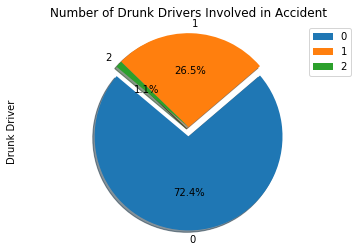

In [7]:
drunk_driver = people_df["Drunk Driver"].value_counts()
drunk_driver.plot(kind="pie", startangle=140, shadow=True, autopct="%1.1f%%", explode=(0.1,0,0))
plt.title("Number of Drunk Drivers Involved in Accident")
plt.axis('equal')
plt.legend(loc="best")
plt.savefig("../Images/DrunkDrivers.png")

In [8]:
people_df["Speed Limit Exceeded"].value_counts()

No                                             3065
Yes, Too Fast for Conditions                    474
Yes                                             282
Unknown                                         113
Yes, Exceeded Speed Limit                        47
Yes, Specifics Unknown                           24
Reported as Unknown                              10
No Driver Present/Unknown if Driver Present       8
Yes, Racing                                       3
Name: Speed Limit Exceeded, dtype: int64

In [9]:
people_df["Speed Limit Exceeded"] = people_df["Speed Limit Exceeded"].replace({"Yes, Too Fast for Conditions": "Yes",
                                                                              "Yes, Exceeded Speed Limit": "Yes",
                                                                              "Yes, Specifics Unknown": "Yes",
                                                                              "Yes, Racing": "Yes",
                                                                              "Reported as Unknown": "Unknown",
                                                                              "No Driver Present/Unknown if Driver Present": "Unknown"})


Text(0.5, 1.0, 'Was the Driver Speeding?')

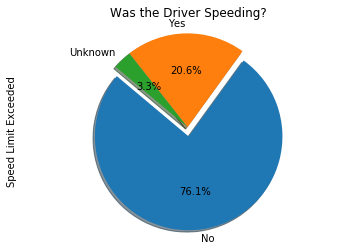

In [10]:
speeding = people_df["Speed Limit Exceeded"].value_counts()
speeding.plot(kind="pie", startangle=140, shadow=True, autopct="%1.1f%%", explode=(0.1,0,0))
plt.axis('equal')
plt.title('Was the Driver Speeding?')

In [11]:
day_of_week = people_df["Day of Week"].value_counts()
my_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_of_week = [day_of_week[i] for i in my_order]
day_of_week

[537, 425, 384, 537, 564, 791, 788]

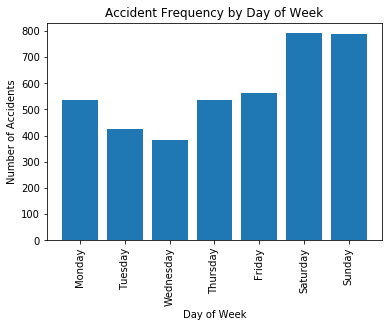

In [12]:
x_axis = np.arange(len(day_of_week))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, day_of_week)
plt.title("Accident Frequency by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Accidents")
plt.xticks(tick_locations, my_order, rotation=90)
plt.savefig("../Images/DayofWeek.png")

In [13]:
days = people_df.groupby("Day of Week")
days_drunk_df = pd.DataFrame(days["Drunk Driver"].value_counts())
days_drunk_df

Drunk Driver
Day of Week Drunk Driver              
Friday      0                      399
            1                      153
            2                       12
Monday      0                      399
            1                      134
            2                        4
Saturday    0                      492
            1                      292
            2                        7
Sunday      0                      501
            1                      266
            2                       21
Thursday    0                      450
            1                       87
Tuesday     0                      361
            1                       64
Wednesday   0                      311
            1                       71
            2                        2

In [14]:
days_drunk_df.loc['Friday'].loc[0]

Drunk Driver    399
Name: 0, dtype: int64

In [15]:
no_drunk_drivers = []
no_drunk_drivers = [days_drunk_df["Drunk Driver"][i][0] for i in my_order]

one_drunk_driver = []
one_drunk_driver = [days_drunk_df["Drunk Driver"][i][1] for i in my_order]

two_drunk_drivers = []
two_drunk_drivers = [days_drunk_df["Drunk Driver"][i][2] for i in my_order if i !="Tuesday"]
two_drunk_drivers.insert(1,0)
two_drunk_drivers

KeyError: 2

In [ ]:
fig, ax = plt.subplots()

# Heights of bars1 + bars2
bars = np.add(no_drunk_drivers, one_drunk_driver).tolist()

ax.bar(my_order, no_drunk_drivers, label = "None")
ax.bar(my_order, one_drunk_driver, label = "One", bottom=no_drunk_drivers)
ax.bar(my_order, two_drunk_drivers, label = "Two", bottom=bars)

ax.set_ylabel('Number of Accidents')
ax.set_title('Number of Drunk Drivers in Accidents by Day of Week')
ax.set_xlabel('Day of Week')
plt.xticks(rotation=90)
ax.legend()

plt.savefig("../Images/DrunkDriversbyDayofWeek.png")
plt.show()

In [ ]:
day_of_week = people_df["Day of Week"].value_counts()
day_of_week.plot(kind="bar")
plt.title("Accident Frequency by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Accidents")

In [ ]:
# Create the bins in which Data will be held
bins = [0, 3, 7, 11, 15, 19, 24]

# Create the names for the four bins
group_names = ["Midnight - 3:59 a.m.", "4 a.m. - 7:59 a.m.", "8 a.m. - 11:59 a.m.", "Noon - 3:59 p.m.", "4 p.m. - 7:59 p.m.", "8 p.m. - 11:59 p.m."]

In [ ]:
people_df["Time Range"] = pd.cut(people_df["Hour"], bins, labels=group_names, include_lowest=True)
people_df

In [ ]:
time = people_df.groupby("Time Range")
time_df = time.count()
time_df = time_df.rename(columns={"Case Number": "Number of Cases"})
time_df

In [ ]:
time_df = time_df[["Number of Cases"]]
time_df.plot(kind="bar")
plt.title("Accident Frequency by Time of Day")
plt.savefig("../Images/TimeofDay.png")

In [ ]:
time_drunk = pd.DataFrame(time["Drunk Driver"].value_counts())
time_drunk

In [ ]:
none = []
none = [time_drunk["Drunk Driver"][i][0] for i in group_names]

one = []
one = [time_drunk["Drunk Driver"][i][1] for i in group_names]

two = [time_drunk["Drunk Driver"]["Midnight - 3:59 a.m."][2], time_drunk["Drunk Driver"]["8 p.m. - 11:59 p.m."][2]]
two.insert(1,0)
two.insert(2,0)
two.insert(3,0)
two.insert(4,0)
two

In [ ]:
max_cases = time_df["Number of Cases"].max()
max_cases

In [ ]:
fig, ax = plt.subplots()

# Heights of bars1 + bars2
bars1 = np.add(none, one).tolist()

ax.bar(group_names, none, label = "None")
ax.bar(group_names, one, label = "One", bottom=none)
ax.bar(group_names, two, label = "Two", bottom=bars1)

ax.set_ylabel('Number of Accidents')
ax.set_title('Number of Drunk Drivers in Accidents by Time of Day')
ax.set_xlabel('Time of Day')
plt.xticks(rotation=90)
ax.legend()

plt.ylim(0,)
plt.savefig("../Images/DrunkDriversbyTimeofDay.png")
plt.show()

In [ ]:
time = people_df.groupby("Time Range")
time_df = time.count()
time_df

In [ ]:
time_df = time_df[["Case Number"]]
time_df = time_df.rename(columns={"Case Number": "Number of Cases"})
time_df.plot(kind="bar")
plt.title("Accident Frequency by Time of Day")

In [ ]:
people_df["Sex"].value_counts()

In [ ]:
people_df["Sex"] = people_df["Sex"].replace({"Reported as Unknown": "Unknown",
                                            "Not Reported": "Unknown"})
gender = people_df["Sex"].value_counts()
gender

In [ ]:
gender.plot(kind="pie", startangle=140, shadow=True, autopct="%1.1f%%", explode=(0.1,0,0))
plt.axis('equal')
plt.title("Gender of Driver")

In [ ]:
death1= people_df.groupby(['Case Number','DOA Name'])
death1.head()

In [ ]:
death1.nunique()

In [ ]:
new = pd.DataFrame(death1.nunique())
new

In [ ]:
new2=pd.DataFrame(new,columns =['Case Number'])
new2

In [ ]:

chart = new2.plot(kind="bar", title="testing")
chart.set_xlabel("DOA Name")
chart.set_ylabel("Case Number")

plt.show()


In [44]:
# Prepare for boxplot and ANOVA of age by number of drunk drivers
people_df.dtypes

Unnamed: 0                   int64
Age                          int64
Age Name                    object
Case Number                  int64
County                      object
DOA Name                    object
Day of Week                 object
Death Day of Month          object
Description of Veh Coll     object
Drunk Driver                 int64
Hour                         int64
Injury Severity Name        object
Lat                        float64
Lng                        float64
Make                        object
Make/Model                  object
Model                       object
Month                       object
Race                        object
Road Type                   object
Sex                         object
Speed Limit Exceeded        object
Speed limit                  int64
Time of Accident            object
Traveled Speed Veh           int64
Type of Vehicle             object
Vin Number                  object
Year                         int64
ZIP Code            

In [45]:
people_df["Age"] = pd.to_numeric(people_df["Age"], errors='coerce')
people_df.dtypes

Unnamed: 0                   int64
Age                          int64
Age Name                    object
Case Number                  int64
County                      object
DOA Name                    object
Day of Week                 object
Death Day of Month          object
Description of Veh Coll     object
Drunk Driver                 int64
Hour                         int64
Injury Severity Name        object
Lat                        float64
Lng                        float64
Make                        object
Make/Model                  object
Model                       object
Month                       object
Race                        object
Road Type                   object
Sex                         object
Speed Limit Exceeded        object
Speed limit                  int64
Time of Accident            object
Traveled Speed Veh           int64
Type of Vehicle             object
Vin Number                  object
Year                         int64
ZIP Code            

In [57]:
people_df_age = people_df.dropna()
people_df_age = people_df_age[people_df_age.Age != 998]
people_df_age = people_df_age[people_df_age.Age != 999]
print(len(people_df_age))

1554


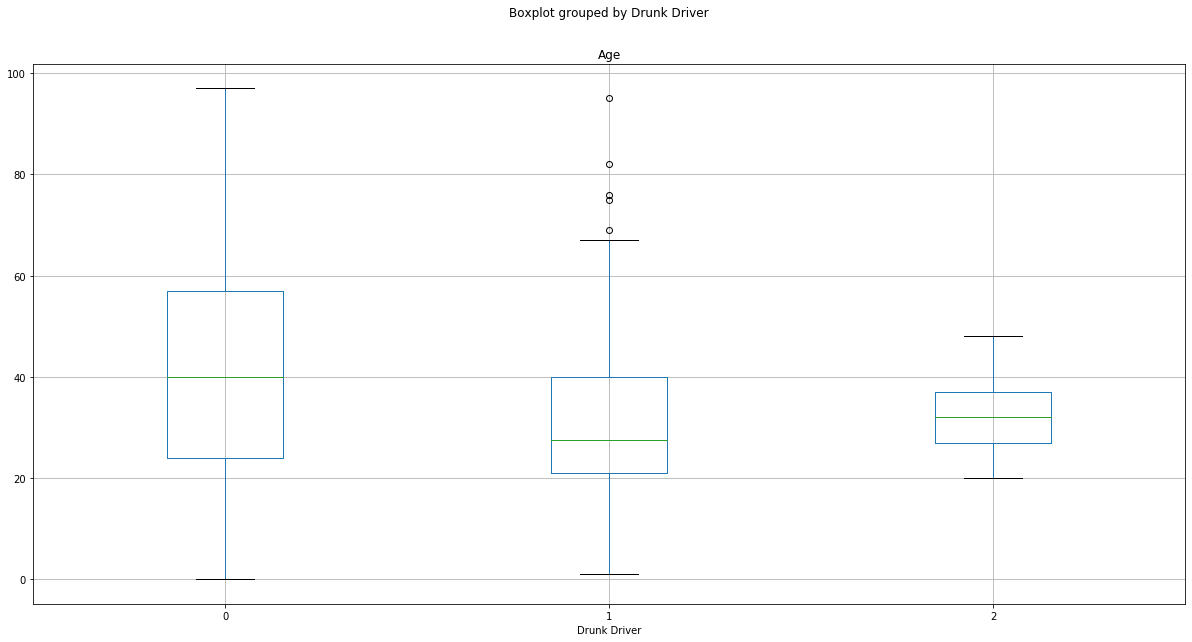

In [61]:
# Create a boxplot to compare means
people_df_age.boxplot("Age", by="Drunk Driver", figsize=(20, 10))
plt.savefig("../Images/AgeBoxplot.png")

In [62]:
# Extract individual groups
none = people_df_age[people_df_age["Drunk Driver"] == 0]["Age"]
one = people_df_age[people_df_age["Drunk Driver"] == 1]["Age"]
two = people_df_age[people_df_age["Drunk Driver"] == 2]["Age"]

In [63]:
# Perform the ANOVA
stats.f_oneway(none, one, two)

F_onewayResult(statistic=47.5844060622521, pvalue=8.781642084571736e-21)